In [7]:
import tensorflow
from keras.layers import Dense, Conv2D
from keras.models import Sequential

In [8]:
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv('/kaggle/input/state-farm-distracted-driver-detection/driver_imgs_list.csv')
df = pd.DataFrame(data)

df.head()
df.shape

(22424, 3)

# splitting the train folder into train and validation data, as we don't have any other data that can act as validation data, the test data contains only images, hence it can't be used as validation data

In [10]:
!pip install split-folders
import splitfolders

In [13]:
trainDirectory = '/kaggle/input/state-farm-distracted-driver-detection/imgs/train'
splitfolders.ratio(trainDirectory, output="newDataset",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 22424 files [02:50, 131.19 files/s]


In [15]:
import os
trainDirectory='/kaggle/working/newDataset/train'
validationDirectory='/kaggle/working/newDataset/val'
os.listdir(trainDirectory), os.listdir(validationDirectory)

(['c0', 'c8', 'c7', 'c3', 'c5', 'c6', 'c9', 'c4', 'c2', 'c1'],
 ['c0', 'c8', 'c7', 'c3', 'c5', 'c6', 'c9', 'c4', 'c2', 'c1'])

In [16]:
len(os.listdir('/kaggle/working/newDataset/train/c0')),len(os.listdir('/kaggle/working/newDataset/val/c0'))

(1991, 498)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [38]:
os.listdir(trainDirectory+'/c0')[0]

'img_80288.jpg'

In [18]:
img=trainDirectory+'/c0/img_80288.jpg'
a=imread(img)


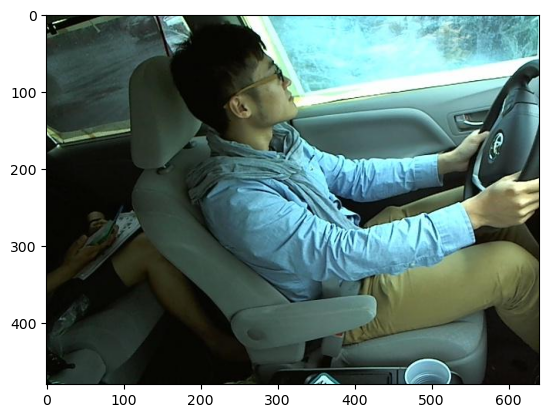

In [19]:
plt.imshow(a)

Creating training data set

In [20]:
dim1=[]
dim2=[]

for img_file in os.listdir(trainDirectory+ '/c0' ):
    img=imread(trainDirectory+'/c0/' + img_file)
    x,y,z=img.shape
    dim1.append(x)
    dim2.append(y)

In [21]:
x=np.mean(dim1)
y=np.mean(dim2)
print(x)
print(y)

480.0
640.0


Generating Different images from available images, and categorising them using ImageDataGenerator

In [22]:
imageShape=(256,256,3)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16

In [26]:
trainGenerator=ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
#                                preprocessing_function=preprocess_input,
                               zoom_range=0.1,
                               horizontal_flip=True,)
valGenerator=ImageDataGenerator(rescale=1./255,
#                                 preprocessing_function=preprocess_input
                               )

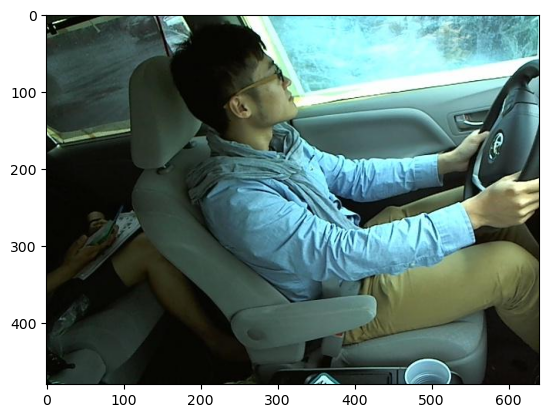

In [27]:
img=trainDirectory+'/c0/img_80288.jpg'
a=imread(img)
plt.imshow(a)

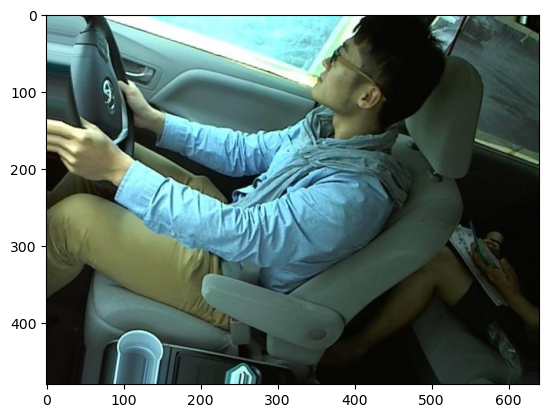

In [30]:
plt.imshow(trainGenerator.random_transform(a))
# imgGenerator.random_transform(a)

using .flow_from_directory to get the images for training

In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [31]:
augmented_train_data=trainGenerator.flow_from_directory(trainDirectory,
                                                       target_size=imageShape[:2],
                                                       batch_size=32,
                                                       class_mode='categorical'
                                                       )

Found 17934 images belonging to 10 classes.


In [32]:
val_data=valGenerator.flow_from_directory(validationDirectory,
                                         target_size=imageShape[:2],
                                         batch_size=32,
                                         class_mode='categorical')

Found 4490 images belonging to 10 classes.


In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Activation, Dropout, MaxPooling2D, Input

Creating model

In [91]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=imageShape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=imageShape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=imageShape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
earlyStop=EarlyStopping(monitor='val_loss', patience=2)

In [100]:
results = model.fit(augmented_train_data,epochs=15,
                             callbacks=[earlyStop],
                             batch_size=32,
                             validation_data=val_data)

Epoch 1/15
561/561 [==============================] - 316s 564ms/step - loss: 0.3920 - accuracy: 0.8669 - val_loss: 0.1562 - val_accuracy: 0.9479
Epoch 2/15
561/561 [==============================] - 314s 561ms/step - loss: 0.3690 - accuracy: 0.8789 - val_loss: 0.1602 - val_accuracy: 0.9508
Epoch 3/15
561/561 [==============================] - 321s 572ms/step - loss: 0.3502 - accuracy: 0.8832 - val_loss: 0.1351 - val_accuracy: 0.9588
Epoch 4/15
561/561 [==============================] - 314s 559ms/step - loss: 0.3429 - accuracy: 0.8868 - val_loss: 0.1400 - val_accuracy: 0.9588
Epoch 5/15
561/561 [==============================] - 317s 564ms/step - loss: 0.3418 - accuracy: 0.8879 - val_loss: 0.1288 - val_accuracy: 0.9581
Epoch 6/15
561/561 [==============================] - 311s 555ms/step - loss: 0.3160 - accuracy: 0.8952 - val_loss: 0.1169 - val_accuracy: 0.9650
Epoch 7/15
561/561 [==============================] - 310s 552ms/step - loss: 0.3118 - accuracy: 0.9005 - val_loss: 0.1408 -

In [110]:
for i in range(len(predicted)):
    sub_df.loc[i, 'img'] = test_ids[i]
    sub_df.loc[i, 'c0':'c9'] = predicted[i]
    
sub_df.to_csv("/kaggle/working/submission.csv",index=False)



# model 2

In [99]:
from keras import layers
from keras import models

model_aug = models.Sequential()
model_aug.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model_aug.add(layers.MaxPooling2D((2, 2)))
#model_aug.add(layers.Dropout(0.5))

model_aug.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.MaxPooling2D((2, 2)))
#model_aug.add(layers.Dropout(0.2))

model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Dropout(0.2))

model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.BatchNormalization())
model_aug.add(layers.MaxPooling2D((2, 2)))

model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))

model_aug.add(layers.Flatten())
model_aug.add(layers.Dense(512, activation='relu'))
model_aug.add(layers.Dropout(0.3))
model_aug.add(layers.Dense(128, activation='relu'))
model_aug.add(layers.Dropout(0.2))
model_aug.add(layers.Dense(10, activation='softmax'))

model_aug.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist_aug=model_aug.fit(
      augmented_train_data,
    batch_size=32,
     # steps_per_epoch=len(train)//128,
      epochs=5,
      validation_data=val_data)
      #validation_steps=len(val)//128)

Epoch 1/5


2023-06-15 22:06:09.107042: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


561/561 [==============================] - 319s 560ms/step - loss: 2.1142 - accuracy: 0.2257 - val_loss: 1.3598 - val_accuracy: 0.5621
Epoch 2/5
561/561 [==============================] - 312s 556ms/step - loss: 1.2208 - accuracy: 0.5608 - val_loss: 0.8484 - val_accuracy: 0.7154
Epoch 3/5
561/561 [==============================] - 313s 558ms/step - loss: 0.7861 - accuracy: 0.7232 - val_loss: 0.4575 - val_accuracy: 0.8327
Epoch 4/5
561/561 [==============================] - 312s 557ms/step - loss: 0.5923 - accuracy: 0.7974 - val_loss: 0.2907 - val_accuracy: 0.9016
Epoch 5/5
561/561 [==============================] - 312s 556ms/step - loss: 0.4765 - accuracy: 0.8389 - val_loss: 0.4075 - val_accuracy: 0.8655


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# transfer Learning

In [36]:
from tensorflow.keras import applications

In [54]:
effNet=applications.efficientnet_v2.EfficientNetV2S(include_top=False, 
                                                     weights='imagenet',
                                                     input_shape=(256,256,3))
effNet.trainable=False

model2=Sequential()

In [55]:
model2.add(effNet)

model2.add(Flatten())

model2.add(Dense(1024,activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(265,activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(10,activation='softmax'))


In [56]:
model2.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

In [ ]:
result=model2.fit(augmented_train_data,
                 validation_data=val_data,
                 callbacks=[earlyStop],
                 epochs=15)

# VGG16 model

In [58]:
vgg=applications.vgg16.VGG16(include_top=False, 
                             weights='imagenet',
                             input_shape=(256,256,3))
vgg.trainable=False

model2=Sequential()


model2.add(vgg)

model2.add(Flatten())

model2.add(Dense(1024,activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(265,activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(10,activation='softmax'))

model2.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

result=model2.fit(augmented_train_data,
                 validation_data=val_data,
                 callbacks=[earlyStop],
                 epochs=15)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/15
561/561 [==============================] - 338s 590ms/step - loss: 1.8450 - accuracy: 0.3995 - val_loss: 0.4881 - val_accuracy: 0.8479
Epoch 2/15
561/561 [==============================] - 335s 597ms/step - loss: 0.6598 - accuracy: 0.7718 - val_loss: 0.1901 - val_accuracy: 0.9463
Epoch 3/15
561/561 [==============================] - 339s 605ms/step - loss: 0.5506 - accuracy: 0.8064 - val_loss: 0.1896 - val_accuracy: 0.9539
Epoch 4/15
561/561 [==============================] - 351s 626ms/step - loss: 0.4809 - accuracy: 0.8318 - val_loss: 0.1424 - val_accuracy: 0.9641
Epoch 5/15
561/561 [==============================] - 334s 595ms/step - loss: 0.4233 - accuracy: 0.8522 - val_loss: 0.1406 - val_accuracy: 0.9655
Epoch 6/15
561/561 [==============================] - 331s 589ms/step - loss: 0.3456 - accuracy: 0.8839 - val_loss: 0.0802 - val_accuracy: 0.9780
Epoch 7/15
561/561 [==============================] - 342s 

In [59]:
model2.save('/kaggle/working/vggModel')

In [65]:
testDirectory='/kaggle/input/state-farm-distracted-driver-detection/imgs/test'
root='/kaggle/input/state-farm-distracted-driver-detection/imgs/'

In [66]:
test_generator=ImageDataGenerator(rescale=1./255)
test_data=test_generator.flow_from_directory(root,
                                            classes=['test'],
                                            batch_size=32,
                                            shuffle=False,
                                            target_size=(256,256))

Found 79726 images belonging to 1 classes.


In [67]:
predicted=model2.predict(test_data)

2492/2492 [==============================] - 803s 322ms/step


In [69]:
test_ids = sorted(os.listdir(testDirectory))
sub_df = pd.DataFrame(columns = ['img','c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])

for i in range(len(test_ids)):
    sub_df.loc[i,'img']=test_ids[i]
    sub_df.loc[i,'c0':'c9']=predicted[i]
    
sub_df.to_csv("/kaggle/working/submission.csv",index=False)


In [37]:
def predict_image(path):
    img = tf.keras.utils.load_img(path).resize((100,100))
    img = np.array(img).reshape((1,100,100,3))
    y = model.predict(img,verbose=False)
    return y


In [ ]:
y = model.predict(test_data)

In [ ]:
df = pd.DataFrame(y)
df.columns = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
filepath = [i.split('/')[-1] for i in test_data.file_paths]
df1 = pd.DataFrame(filepath)
df1.columns = ['img']
df = df1.join(df)
df.to_csv('/kaggle/working/output.csv',index=False)